In [37]:
import pandas as pd

df = pd.read_csv('data-covid19.csv')
df['ds'] = pd.to_datetime(df.fecha)
df.tail()

,region,fecha,casos_acum,confirmados,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
715,Ñuble,2020/04/12,613,7,119.831649,1,7,NaN,2020-04-12
716,Ñuble,2020/04/13,618,5,120.809069,0,7,NaN,2020-04-13
717,Ñuble,2020/04/14,622,4,121.591005,1,8,NaN,2020-04-14
718,Ñuble,2020/04/15,634,12,123.936812,0,8,NaN,2020-04-15
719,Ñuble,2020/04/16,639,5,124.914231,2,10,NaN,2020-04-16


In [45]:
# Proyectamos con nuevos casos

prophet_df = df.groupby('fecha').sum().rename(columns={'casos_acum': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df.index)
prophet_df.tail()

,y,confirmados,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
fecha,,,,,,,
2020/04/12,7213,286,693.518284,7,80,0.0,2020-04-12
2020/04/13,7525,312,716.582169,2,82,0.0,2020-04-13
2020/04/14,7917,392,741.421377,10,92,0.0,2020-04-14
2020/04/15,8273,356,764.430886,2,94,0.0,2020-04-15
2020/04/16,8807,534,799.364679,11,105,0.0,2020-04-16


In [46]:
from fbprophet import Prophet

m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
# Python
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
130,2020-07-11
131,2020-07-12
132,2020-07-13
133,2020-07-14
134,2020-07-15


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
130,2020-07-11,42846.971651,32929.192445,53583.183819
131,2020-07-12,43181.352219,33045.918825,54054.746959
132,2020-07-13,43553.732788,33307.314816,54701.120814
133,2020-07-14,43934.974370,33536.130211,55263.733828
134,2020-07-15,44327.706794,33845.900519,55904.261240


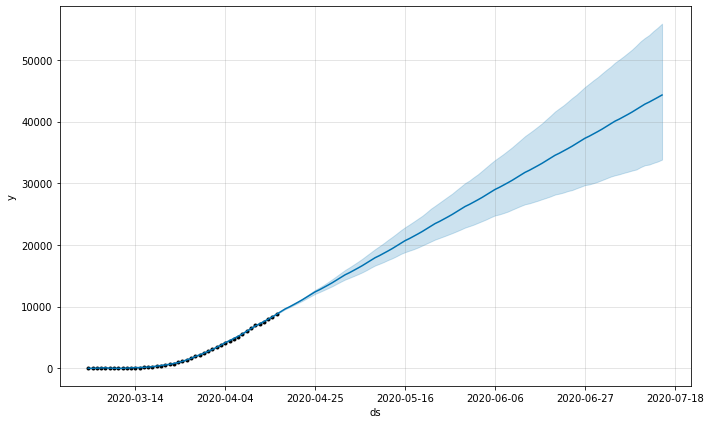

In [53]:
fig1 = m.plot(forecast)

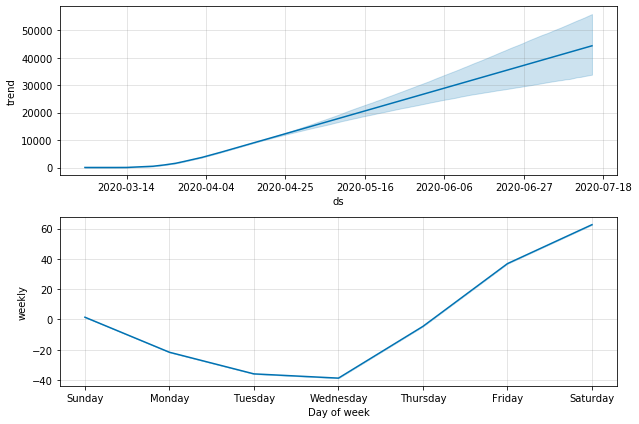

In [54]:
fig2 = m.plot_components(forecast)

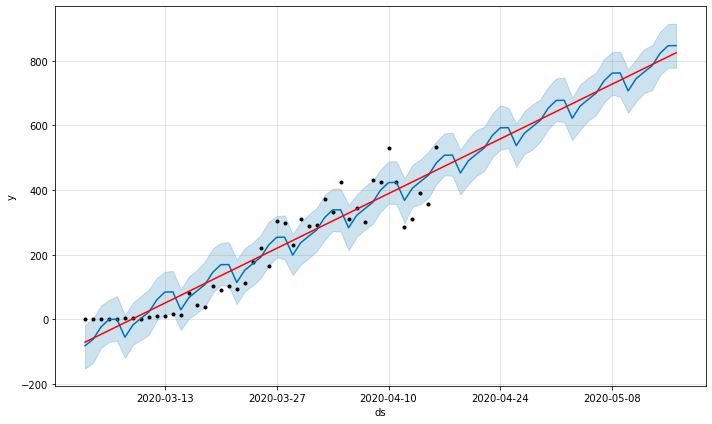

In [44]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)